In [38]:
## Problem Statement
# Binary Classification
# Colored Images
# No Standard Dimension
# Kaggle Dataset

## Process
# CNN with small dataset ~ 70% accuracy
# CNN with data augmentation >~ 80% accuracy
# Transfer Learning ~ 90% accuracy

# Download Dataset from https://drive.google.com/file/d/16AlwTDOeyFaiP3RPxKOk5s80IycK80X4/view

In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlt
import matplotlib.pyplot as plt

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
train_dir = r'Data Files\cats_and_dogs_small\train'
validation_dir = r'Data Files\cats_and_dogs_small\validation'
test_dir = r'Data Files\cats_and_dogs_small\test'

In [42]:
## Data preprocessing
# Read the Picture
# Decode the JPEG into RGB grid of pixles
# Convert into floating point tensors
# Rescale the pixel values(0 to 255) 

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
## Links:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://keras.io/api/preprocessing/image/

In [45]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [47]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [49]:
from tensorflow.keras import optimizers

## lr - learning rate ~ 0.0001 = 1e-4

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [50]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=20,
                             validation_data=validation_generator,
                             validation_steps=30)

Epoch 1/20
100/100 [==============================] - 120s 1s/step - loss: 0.6858 - acc: 0.5390 - val_loss: 0.6622 - val_acc: 0.6350
Epoch 2/20
100/100 [==============================] - 110s 1s/step - loss: 0.6425 - acc: 0.6340 - val_loss: 0.6216 - val_acc: 0.6333
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.5937 - acc: 0.6755 - val_loss: 0.6277 - val_acc: 0.6250
Epoch 4/20
100/100 [==============================] - 104s 1s/step - loss: 0.5592 - acc: 0.7035 - val_loss: 0.5796 - val_acc: 0.6817
Epoch 5/20
100/100 [==============================] - 114s 1s/step - loss: 0.5328 - acc: 0.7340 - val_loss: 0.5841 - val_acc: 0.6900
Epoch 6/20
100/100 [==============================] - 105s 1s/step - loss: 0.5143 - acc: 0.7355 - val_loss: 0.5958 - val_acc: 0.6783
Epoch 7/20
100/100 [==============================] - 101s 1s/step - loss: 0.4909 - acc: 0.7695 - val_loss: 0.6473 - val_acc: 0.6533
Epoch 8/20
100/100 [==============================] - 102s 1s/step - 

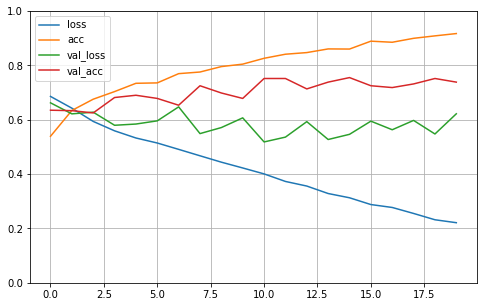

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
### Overfitting - validation accuracy vs accuracy
## Need to preprocess images with scale, rotation, shear

In [52]:
model.save("CatsDogsImageClassifier.h5")

In [53]:
keras.backend.clear_session()
del model

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy',
             metrics=['acc'],
             optimizer=optimizers.RMSprop(lr=1e-4))

In [60]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=62,
                             epochs=20,
                             validation_data=validation_generator,
                             validation_steps=31)

Epoch 1/20
62/62 [==============================] - 125s 2s/step - loss: 0.6725 - acc: 0.5666 - val_loss: 0.6624 - val_acc: 0.5837
Epoch 2/20
62/62 [==============================] - 136s 2s/step - loss: 0.6635 - acc: 0.5899 - val_loss: 0.6448 - val_acc: 0.6079
Epoch 3/20
62/62 [==============================] - 139s 2s/step - loss: 0.6513 - acc: 0.6220 - val_loss: 0.6374 - val_acc: 0.6159
Epoch 4/20
62/62 [==============================] - 125s 2s/step - loss: 0.6347 - acc: 0.6316 - val_loss: 0.6610 - val_acc: 0.5524
Epoch 5/20
62/62 [==============================] - 125s 2s/step - loss: 0.6265 - acc: 0.6529 - val_loss: 0.6102 - val_acc: 0.6663
Epoch 6/20
62/62 [==============================] - 125s 2s/step - loss: 0.6198 - acc: 0.6438 - val_loss: 0.5916 - val_acc: 0.6885
Epoch 7/20
62/62 [==============================] - 125s 2s/step - loss: 0.6031 - acc: 0.6682 - val_loss: 0.5984 - val_acc: 0.6623
Epoch 8/20
62/62 [==============================] - 128s 2s/step - loss: 0.6019 - a

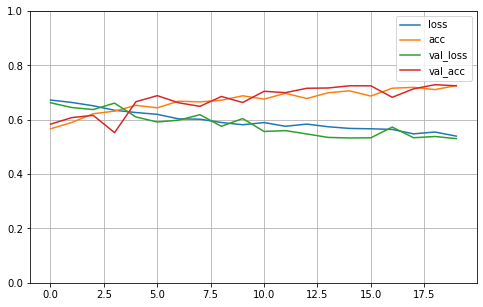

In [61]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Epoch 1/100
62/62 [==============================] - 158s 3s/step - loss: 0.5470 - acc: 0.7195 - val_loss: 0.5734 - val_acc: 0.6966
Epoch 2/100
62/62 [==============================] - 132s 2s/step - loss: 0.5326 - acc: 0.7271 - val_loss: 0.5264 - val_acc: 0.7389
Epoch 3/100
62/62 [==============================] - 130s 2s/step - loss: 0.5353 - acc: 0.7307 - val_loss: 0.5672 - val_acc: 0.7198
Epoch 4/100
62/62 [==============================] - 131s 2s/step - loss: 0.5346 - acc: 0.7312 - val_loss: 0.5079 - val_acc: 0.7510
Epoch 5/100
62/62 [==============================] - 127s 2s/step - loss: 0.5250 - acc: 0.7383 - val_loss: 0.5010 - val_acc: 0.7581
Epoch 6/100
62/62 [==============================] - 124s 2s/step - loss: 0.5328 - acc: 0.7332 - val_loss: 0.5170 - val_acc: 0.7329
Epoch 7/100
62/62 [==============================] - 125s 2s/step - loss: 0.5126 - acc: 0.7551 - val_loss: 0.4931 - val_acc: 0.7540
Epoch 8/100
62/62 [==============================] - 124s 2s/step - loss: 0.

62/62 [==============================] - 133s 2s/step - loss: 0.4053 - acc: 0.8140 - val_loss: 0.4697 - val_acc: 0.7944
Epoch 63/100
62/62 [==============================] - 139s 2s/step - loss: 0.4239 - acc: 0.8110 - val_loss: 0.4434 - val_acc: 0.7933
Epoch 64/100
62/62 [==============================] - 129s 2s/step - loss: 0.4180 - acc: 0.8090 - val_loss: 0.4420 - val_acc: 0.8044
Epoch 65/100
62/62 [==============================] - 131s 2s/step - loss: 0.4092 - acc: 0.8079 - val_loss: 0.6376 - val_acc: 0.6956
Epoch 66/100
62/62 [==============================] - 130s 2s/step - loss: 0.4272 - acc: 0.8034 - val_loss: 0.4633 - val_acc: 0.7994
Epoch 67/100
62/62 [==============================] - 129s 2s/step - loss: 0.4152 - acc: 0.8095 - val_loss: 0.4812 - val_acc: 0.7823
Epoch 68/100
62/62 [==============================] - 133s 2s/step - loss: 0.4065 - acc: 0.8150 - val_loss: 0.4611 - val_acc: 0.8014
Epoch 69/100
62/62 [==============================] - 131s 2s/step - loss: 0.4126 

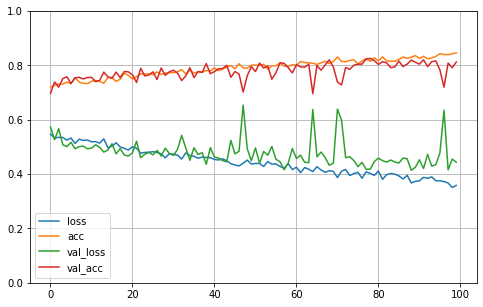

In [63]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=62,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=31)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()